In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


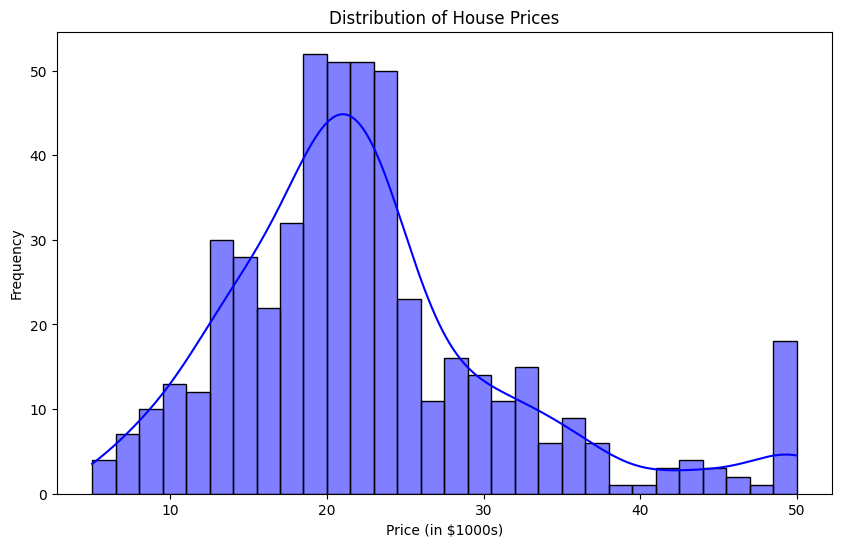

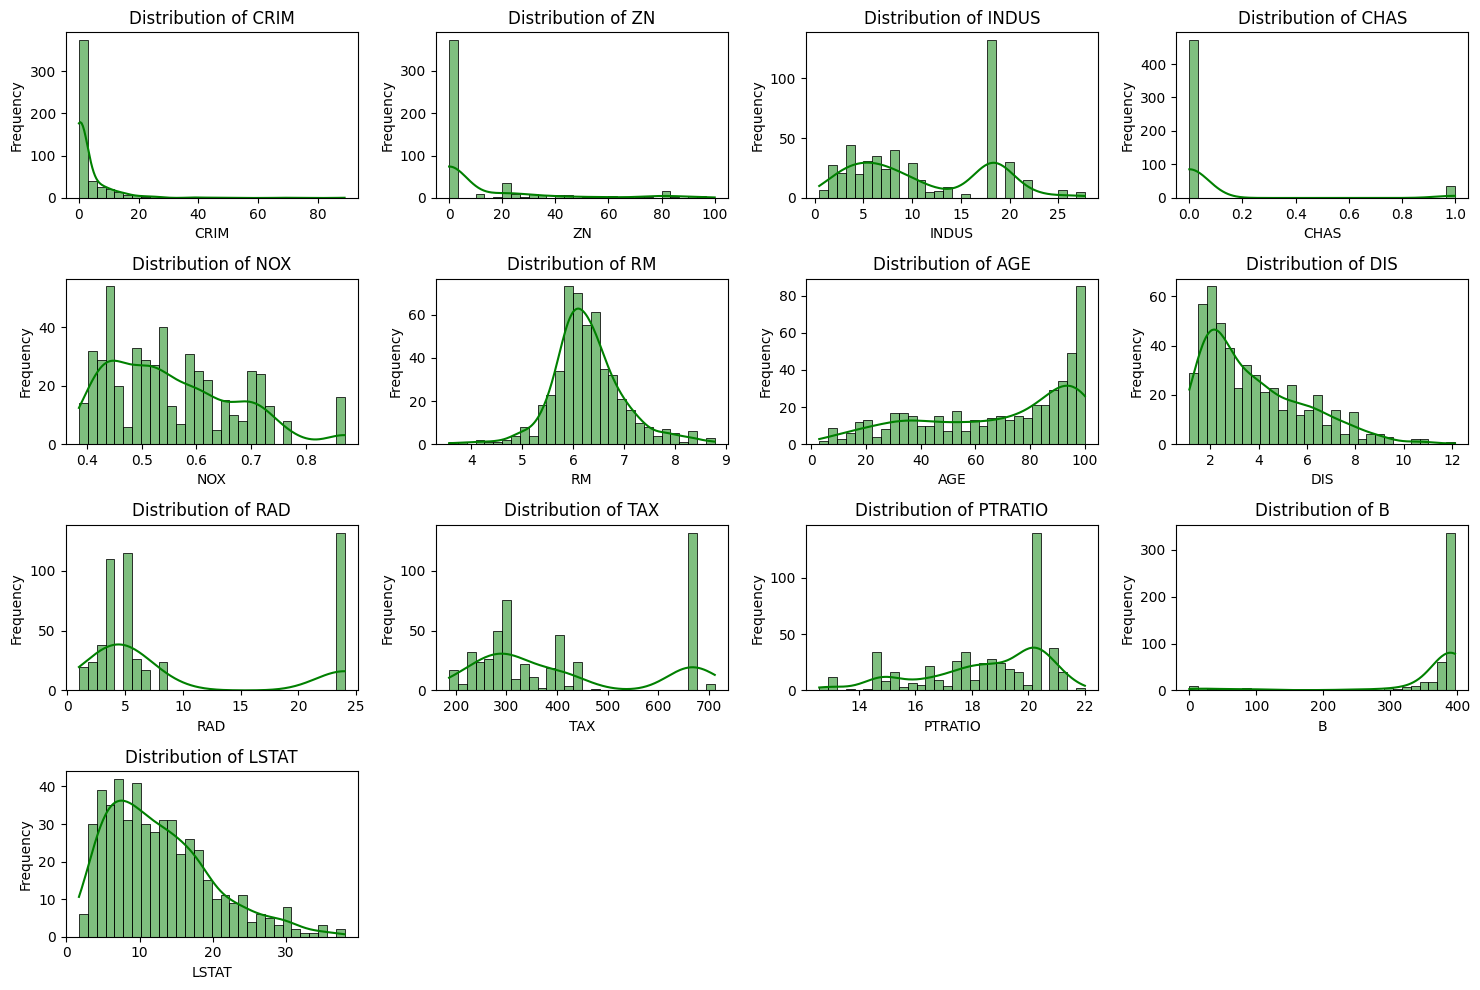

In [ ]:
import pandas as pd
import numpy as np

# Load the Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert the data to a pandas DataFrame for easier manipulation
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston_df = pd.DataFrame(data=data, columns=columns)
boston_df['PRICE'] = target

# Visualize the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PRICE'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price (in $1000s)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of individual features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(boston_df[feature], bins=30, kde=True, color='green')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:

# Split the data into features (X) and target variable (y)
X = boston_df.drop(columns=['PRICE'])
y = boston_df['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 24.291119474973478
R2 Score: 0.6687594935356326


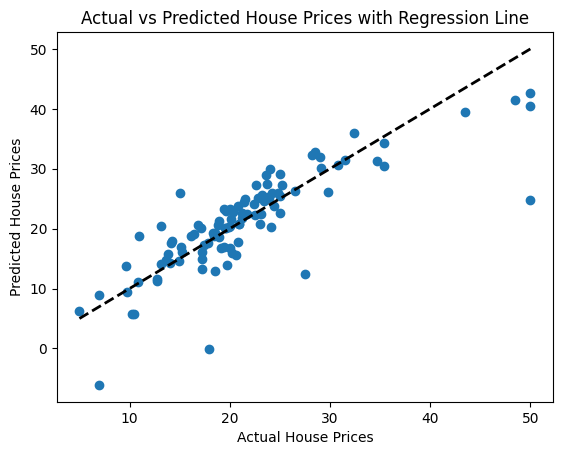

In [ ]:
# Visualize the model's performance with regression line
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices with Regression Line")
plt.show()
